In [58]:
import numpy as np
import pandas as pd
import os

params = pd.read_csv('./params.txt', sep = " ", header=None).to_numpy()
num_exps_, num_params_ = params.shape 
params = params.tolist()
for i in range(num_exps_):
    for j in range(num_params_ ):
        if j == (num_params_ - 1):
            params[i][j] = str(int(params[i][j]))
        else:
            params[i][j] = f'{params[i][j]:.6f}'
params

[['1.500000', '0.014290', '2.500000', '0']]

In [59]:
orderings_bvec = ['random', 'morton',  'kdtree', 'hilbert']
cs_set_bvec = [10, 60, 180]
bs_set_bvec = [20]
orderings_cvec = ['random']
cs_set_cvec = [30, 60]
bs_set_cvec = [1]
seeds = np.arange(1, 51)

filename_template = 'locs_20000_cs_{}_bs_{}_seed_{}_kernel_{}:{}:{}_{}'
file_folder = './log/simu-20k/'
fig_folder = './fig/simu-20k/'

if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

# params_sum_bvec = np.zeros([len(seeds), num_exps_, num_params_ - 1, 
#                         len(orderings_bvec), len(cs_set_bvec), 
#                         len(bs_set_bvec)])
# params_sum_cvec = np.zeros([len(seeds), num_exps_, num_params_ - 1, 
#                         len(orderings_cvec), len(cs_set_cvec), 
#                         len(bs_set_cvec)])

def read_params(seeds, params, orderings, cs_set, bs_set):
    params_sum = np.zeros([len(seeds), num_exps_, num_params_-1, 
                        len(orderings), len(cs_set), len(bs_set)])
    for i_seed, seed in enumerate(seeds):
        for i_param, param in enumerate(params):
            for i_ord, ord in enumerate(orderings):
                for i_cs, cs in enumerate(cs_set):
                    for i_bs, bs in enumerate(bs_set):
                        filename = filename_template.format(cs, bs, seed, param[0], param[1], param[2], ord)
                        file_path = os.path.join(file_folder, filename)
                        try:
                            with open(file_path, 'r') as file:
                                # Use a loop to skip the first line
                                file.readline()  # Read and discard the first line
                                # Now, read the second line
                                second_line = file.readline()
                                # print(second_line)
                                # print(second_line.split(", "))
                                # print(dense_llh[i], float(second_line.split(",")[4]))
                                params_sum[i_seed, i_param, 0, i_ord, i_cs, i_bs] = float(second_line.split(", ")[1])
                                params_sum[i_seed, i_param, 1, i_ord, i_cs, i_bs] = float(second_line.split(", ")[2])
                                params_sum[i_seed, i_param, 2, i_ord, i_cs, i_bs] = float(second_line.split(", ")[3])
                                # params_sum[i_seed, i_param, 3, i_ord, i_cs, i_bs] = float(second_line.split(", ")[4])
                        except FileNotFoundError:
                            print(f"File {filename} not found")

    return params_sum

params_sum_bvec = read_params(seeds, params, orderings_bvec, cs_set_bvec, bs_set_bvec)
params_sum_cvec = read_params(seeds, params, orderings_cvec, cs_set_cvec, bs_set_cvec)
print(params_sum_bvec.shape)
print(params_sum_cvec.shape)

(50, 1, 3, 4, 3, 1)
(50, 1, 3, 1, 2, 1)


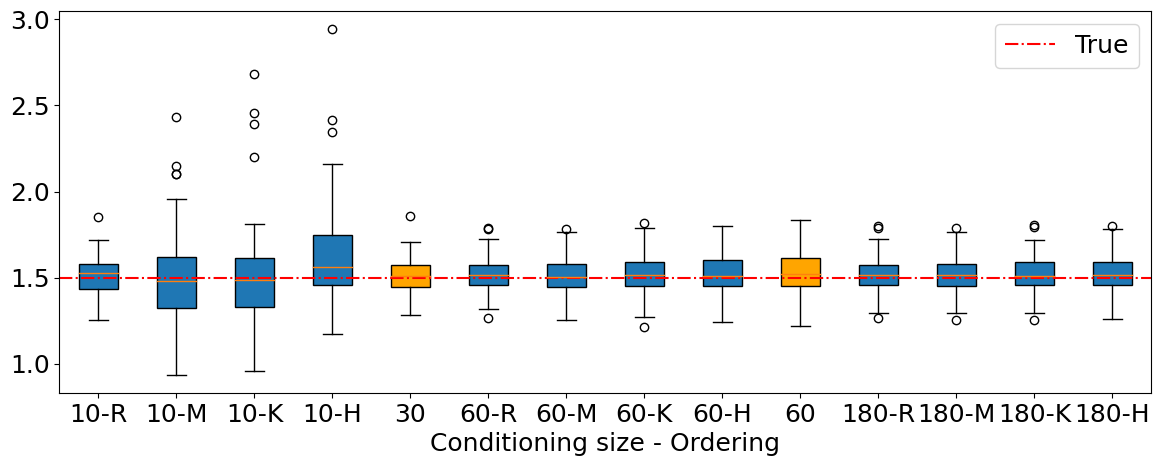

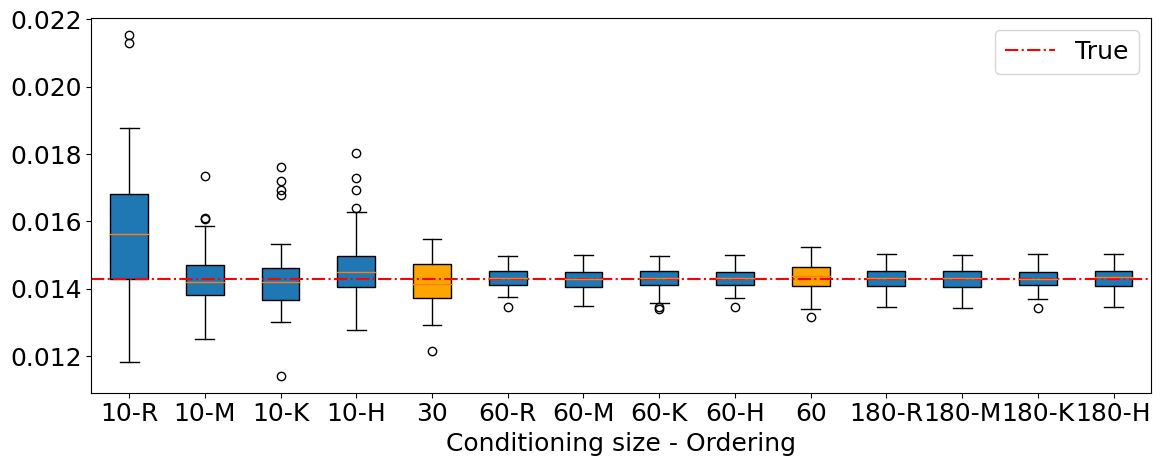

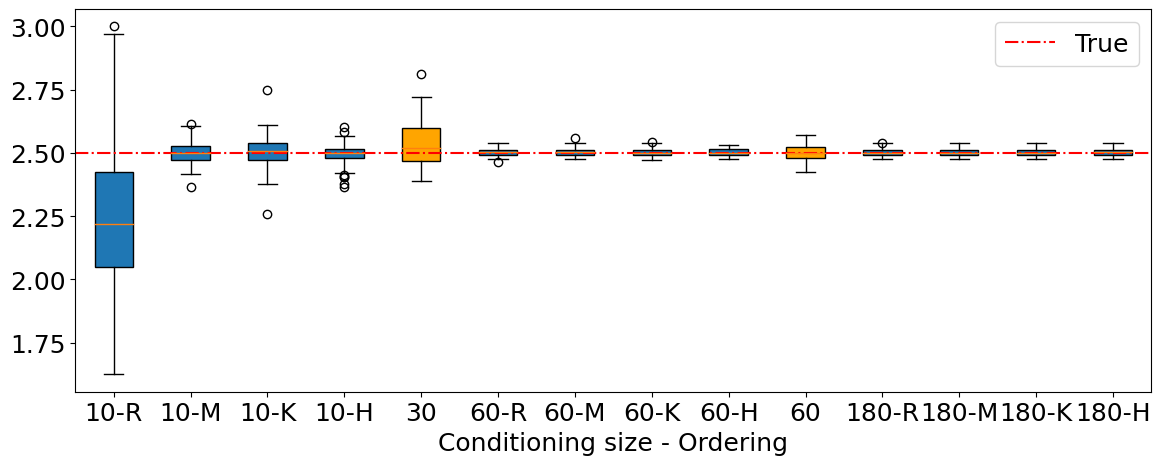

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18  # You can set any numeric value here

markers = ['P', '*', 'd', 'X', '8']
colors = [
    "#3357FF",  # Royal blue
    "#33FFF6",  # Cyan
    "#8B4513",  # Saddle brown
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#FF69B4",   # Hot pink
]
linestyles = ['-', '-.', '--']

def plot_boxplot(data, index=0, params=None):
    # Create a figure and an axes instance
    data = data[:, :, index, :, :, :]
    # Reshape the data to collapse unnecessary dimensions
    reshaped_data = data.squeeze()  # This should result in a shape of (50, 4, 3)
    _params_sum_cvec = params_sum_cvec[:, :, index, :, :, :] # dim of (seeds, ordering, cs)
    _reshape_data_cvec = _params_sum_cvec.squeeze()# dim of (seeds, cs)

    # Prepare boxplot data
    # We need to create a list of arrays, each array for a boxplot
    boxplot_data = []
    for j in range(3): # cs-set
        for i in range(len(orderings_bvec)): # orderings
            boxplot_data.append(reshaped_data[:, i, j])
        
        if j == 1:
            boxplot_data.append(_reshape_data_cvec[:, 0])
        if j == 2:
            boxplot_data.append(_reshape_data_cvec[:, 1])

    # Create a figure and an axes instance
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plotting the boxplots
    bplot = ax.boxplot(boxplot_data, patch_artist=True)

    # Apply colors
    # classic vecchia
    bplot['boxes'][len(orderings_bvec)].set_facecolor('orange')
    bplot['boxes'][len(orderings_bvec) * 2 + 1].set_facecolor('orange')
    # block vecchia
    # bplot['boxes'][0].set_facecolor(colors[0])
    # bplot['boxes'][1].set_facecolor(colors[0])
    # bplot['boxes'][2].set_facecolor(colors[0])
    # bplot['boxes'][3].set_facecolor(colors[0])
    # # 
    # bplot['boxes'][5].set_facecolor(colors[1])
    # bplot['boxes'][6].set_facecolor(colors[1])
    # bplot['boxes'][7].set_facecolor(colors[1])
    # bplot['boxes'][8].set_facecolor(colors[1])
    # #
    # bplot['boxes'][10].set_facecolor(colors[2])
    # bplot['boxes'][11].set_facecolor(colors[2])
    # bplot['boxes'][12].set_facecolor(colors[2])
    # bplot['boxes'][13].set_facecolor(colors[2])

    # Customizing the plot
    # ax.set_title('All Boxplots in a Single Figure')
    # ax.set_xlabel('Boxplot Number')
    # ax.set_ylabel('Values')
    _maxy = np.max(reshaped_data)
    _miny = np.min(reshaped_data)
    # plt.ylim(_miny * 1.1, _maxy * 0.9)
    ax.axhline(float(params[index]), color = 'red', linestyle='-.', label='True')
    plt.legend()
    plt.xticks(np.arange(1, len(orderings_bvec) * len(cs_set_bvec) + 3), 
                    ["10-R", "10-M", "10-K", "10-H", 
                    "30", 
                    "60-R", "60-M", "60-K", "60-H", 
                    "60", 
                    "180-R", "180-M", "180-K", "180-H"])
    plt.xlabel("Conditioning size - Ordering")
    # if (index == 0):
    #     plt.ylabel(r"$\hat \sigma^2$")
    plt.tight_layout()
    plt.savefig("./fig/simu-20k/" + f'{params[1]}_{params[2]}_{index}.pdf')
    # Show the plot
    plt.show()

for i in range(3):
    plot_boxplot(params_sum_bvec, i, params[0])